# Lib

In [2]:
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Check Data

In [3]:
# index  

# gender: 성별  
# car: 차량 소유 여부  
# reality: 부동산 소유 여부  
# child_num: 자녀 수  
# income_total: 연간 소득  
# income_type: 소득 분류  ['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']  
# edu_type: 교육 수준  ['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']  

# family_type: 결혼 여부 ['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']  

# house_type: 생활 방식 ['Municipal apartment', 'House / apartment', 'With parents',  
# 					'Co-op apartment', 'Rented apartment', 'Office apartment']  
# DAYS_BIRTH: 출생일  	데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미  

# DAYS_EMPLOYED: 업무 시작일  
# 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미  
# 양수 값은 고용되지 않은 상태를 의미함  

# FLAG_MOBIL: 핸드폰 소유 여부  
# work_phone: 업무용 전화 소유 여부  
# phone: 전화 소유 여부  
# email: 이메일 소유 여부  
# occyp_type: 직업 유형  
# family_size: 가족 규모  
# begin_month: 신용카드 발급 월  
# 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미  
# credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도  
# => 낮을 수록 높은 신용의 신용카드 사용자를 의미함  

In [4]:
train=pd.read_csv('./data/train.csv')
test=pd.read_csv('./data/test.csv')

In [5]:
train.head(5)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [6]:
train.shape

(26457, 20)

In [7]:
test.head(5)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


In [8]:
test.shape

(10000, 19)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          10000 non-null  int64  
 1   gender         10000 non-null  object 
 2   car            10000 non-null  object 
 3   reality        10000 non-null  object 
 4   child_num      10000 non-null  int64  
 5   income_total   10000 non-null  float64
 6   income_type    10000 non-null  object 
 7   edu_type       10000 non-null  object 
 8   family_type    10000 non-null  object 
 9   house_type     10000 non-null  object 
 10  DAYS_BIRTH     10000 non-null  int64  
 11  DAYS_EMPLOYED  10000 non-null  int64  
 12  FLAG_MOBIL     10000 non-null  int64  
 13  work_phone     10000 non-null  int64  
 14  phone          10000 non-null  int64  
 15  email          10000 non-null  int64  
 16  occyp_type     6848 non-null   object 
 17  family_size    10000 non-null  float64
 18  begin_m

In [11]:
train.nunique()

index            26457
gender               2
car                  2
reality              2
child_num            9
income_total       249
income_type          5
edu_type             5
family_type          5
house_type           6
DAYS_BIRTH        6621
DAYS_EMPLOYED     3470
FLAG_MOBIL           1
work_phone           2
phone                2
email                2
occyp_type          18
family_size         10
begin_month         61
credit               3
dtype: int64

In [12]:
test.nunique()

index            10000
gender               2
car                  2
reality              2
child_num            6
income_total       208
income_type          5
edu_type             5
family_type          5
house_type           6
DAYS_BIRTH        4675
DAYS_EMPLOYED     2665
FLAG_MOBIL           1
work_phone           2
phone                2
email                2
occyp_type          18
family_size          7
begin_month         61
dtype: int64

# Duplicated dorp 1

In [13]:
train.shape,test.shape

((26457, 20), (10000, 19))

In [14]:
def duplicate(df):
    condition1 = df.drop('credit', axis=1).duplicated(keep=False) # 신용등급 제외한 중복된 데이터 (더 많은 데이터 수 보유)
    duplicated_idx1 = condition1[condition1].index # 신용 등급 제외한 중복 데이터 리스트(인덱스)
    print(df.loc[duplicated_idx1].shape, '신용등급만 다를 수 있는 shape')
    duplicated_df_idx = df.loc[duplicated_idx1].index # 신용정보 없는 중복 데이터들 > 신용정보 필요함 > 인덱스화해서 df에 대입하기
    duplicated_df = df.loc[duplicated_df_idx].sort_values(by='credit') # 중복된 데이터들을 신용 0등급 > 1등급 > 2등급 순으로 배치 후 
    # 신용등급만 다를 수 있는 중복 데이터 추출 완료
    print(duplicated_df.shape, '신용등급만 다를 수 있는 shape') 
    duplicated_df.drop_duplicates(keep='first', inplace=True) # 중복된 데이터 삭제(0등급이 먼저 배치되어 있으므로 삭제되는건 0등급보다 뒤에 있는 값들임) 
    # 중복 데이터 중에 우수 등급의 고객들만 추출완료
    print(duplicated_df.shape, '신용 미흡한 중복값들 제거 된 후 shape') # >>> 제거 될 건 다 제거되고 남은 값들임

    df.drop(index=duplicated_idx1, inplace=True) # 기존 데이터에서의 (신용정보만 다른 값 포함한) 중복되는 모든 데이터 삭제
    print(df.shape, '원본데이터에서 중복되는 모든값 삭제한 shape')
    df = pd.concat([df, duplicated_df], axis=0, ignore_index=True) # 기존 데이터에 삭제된 우수 등급 고객들만 다시 추가
    print('---')
    print(df.shape, '최종적으로 중복값들 중에 우수 고객들과 다시 합친 최종 shape')
    return df

train = duplicate(train) 
#display(duplicated_train.head(3))

(0, 20) 신용등급만 다를 수 있는 shape
(0, 20) 신용등급만 다를 수 있는 shape
(0, 20) 신용 미흡한 중복값들 제거 된 후 shape
(26457, 20) 원본데이터에서 중복되는 모든값 삭제한 shape
---
(26457, 20) 최종적으로 중복값들 중에 우수 고객들과 다시 합친 최종 shape


In [15]:
#test.drop_duplicates(test.columns[1:],keep='first',inplace=True)

train.reset_index(inplace=True,drop=True)
# test.reset_index(inplace=True,drop=True)

In [16]:
train.shape,test.shape

((26457, 20), (10000, 19))

In [17]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [18]:
test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


# Fill NaN

In [19]:
train.isna().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [20]:
test.isna().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       3152
family_size         0
begin_month         0
dtype: int64

In [21]:
sum(train['DAYS_EMPLOYED']>=0)

4438

In [22]:
train['DAYS_EMPLOYED'].value_counts()

 365243    4438
-401         57
-1539        47
-200         45
-2087        44
           ... 
-10475        1
-2202         1
-2552         1
-680          1
-4973         1
Name: DAYS_EMPLOYED, Length: 3470, dtype: int64

In [23]:
sum(test['DAYS_EMPLOYED']>=0)

1697

In [24]:
test['DAYS_EMPLOYED'].value_counts()

 365243    1697
-1678        22
-1661        21
-401         21
-2057        20
           ... 
-6359         1
-3116         1
-1623         1
-1505         1
-770          1
Name: DAYS_EMPLOYED, Length: 2665, dtype: int64

In [25]:
def occyp_type(x):
    x['occyp_type']=x['occyp_type'].fillna('NAN')
    x.loc[x['DAYS_EMPLOYED'] >= 0, 'DAYS_EMPLOYED']=0
    x.loc[(x['DAYS_EMPLOYED']==0)&(x['occyp_type']=='NAN'),'occyp_type']='No work experience'
    print(x['occyp_type'].value_counts(),'\n')

occyp_type(train)
occyp_type(test)


Laborers                 4512
No work experience       4438
NAN                      3733
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1575
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Security staff            424
Cleaning staff            403
Private service staff     243
Low-skill Laborers        127
Waiters/barmen staff      124
Secretaries                97
Realty agents              63
HR staff                   62
IT staff                   41
Name: occyp_type, dtype: int64 

Laborers                 1699
No work experience       1697
NAN                      1455
Sales staff               946
Core staff                945
Managers                  845
Drivers                   563
High skill tech staff     343
Medicine staff            343
Accountants               339
Cooking staff             198
Security staff            168
Cleanin

# Drop columns 1

In [26]:
# 의미없는 열 삭제 / index = index / FLAG_MOBIL = 전부 1

train.drop(['index', 'FLAG_MOBIL'], axis=1, inplace=True)
test.drop(['index', 'FLAG_MOBIL'], axis=1, inplace=True)

In [27]:
train.head(5)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,0,0,0,NAN,2.0,-6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,0,0,1,Laborers,3.0,-5.0,1.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,0,1,0,Managers,2.0,-22.0,2.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,0,1,0,Sales staff,2.0,-37.0,0.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,0,0,0,Managers,2.0,-26.0,2.0


In [28]:
test.head(5)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month
0,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,0,0,1,0,No work experience,2.0,-60.0
1,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,0,1,0,Core staff,2.0,-36.0
2,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,0,Laborers,2.0,-40.0
3,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,0,0,Drivers,2.0,-41.0
4,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,0,0,Managers,2.0,-8.0


# Check Outlier

In [29]:
train_col=train.columns

In [30]:
for i in train_col[:-1]:
    print(i)
    print(train[i].value_counts())
    print('\n')

gender
F    17697
M     8760
Name: gender, dtype: int64


car
N    16410
Y    10047
Name: car, dtype: int64


reality
Y    17830
N     8627
Name: reality, dtype: int64


child_num
0     18340
1      5386
2      2362
3       306
4        47
5        10
14        3
7         2
19        1
Name: child_num, dtype: int64


income_total
135000.0    3164
157500.0    2233
180000.0    2225
112500.0    2178
225000.0    2170
            ... 
57150.0        1
51750.0        1
87448.5        1
227250.0       1
191700.0       1
Name: income_total, Length: 249, dtype: int64


income_type
Working                 13645
Commercial associate     6202
Pensioner                4449
State servant            2154
Student                     7
Name: income_type, dtype: int64


edu_type
Secondary / secondary special    17995
Higher education                  7162
Incomplete higher                 1020
Lower secondary                    257
Academic degree                     23
Name: edu_type, dtype: int64


f

In [31]:
out_col=['child_num','income_type','family_size']

for i in out_col:
    print(i)
    print(train[i].value_counts())
    print('\n')

child_num
0     18340
1      5386
2      2362
3       306
4        47
5        10
14        3
7         2
19        1
Name: child_num, dtype: int64


income_type
Working                 13645
Commercial associate     6202
Pensioner                4449
State servant            2154
Student                     7
Name: income_type, dtype: int64


family_size
2.0     14106
1.0      5109
3.0      4632
4.0      2260
5.0       291
6.0        44
7.0         9
15.0        3
9.0         2
20.0        1
Name: family_size, dtype: int64




In [32]:
for i in out_col:
    print(i)
    print(test[i].value_counts())
    print('\n')

child_num
0    6861
1    2106
2     894
3     113
4      16
5      10
Name: child_num, dtype: int64


income_type
Working                 5174
Commercial associate    2288
Pensioner               1703
State servant            831
Student                    4
Name: income_type, dtype: int64


family_size
2.0    5357
1.0    1878
3.0    1789
4.0     846
5.0     106
6.0      14
7.0      10
Name: family_size, dtype: int64




In [33]:
train[train['child_num']>5].index

Int64Index([8462, 9021, 10731, 25313, 25390, 25638], dtype='int64')

In [34]:
def drop_child(data,num):
    row=data[data['child_num'] > num].index
    data.drop(row,inplace=True)
    data.reset_index(drop=True,inplace=True)
drop_child(train,5)

In [35]:
def drop_family(data,num):
    row=data[data['family_size'] > num].index
    data.drop(row,inplace=True)
    data.reset_index(drop=True,inplace=True)

drop_family(train,7)
    

# Change negative num to positive num

In [36]:
train.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,0,0,0,NAN,2.0,-6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,0,0,1,Laborers,3.0,-5.0,1.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,0,1,0,Managers,2.0,-22.0,2.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,0,1,0,Sales staff,2.0,-37.0,0.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,0,0,0,Managers,2.0,-26.0,2.0


In [37]:
# 'DAYS_BIRTH','DAYS_EMPLOYED','begin_month'

In [38]:
neg=['DAYS_BIRTH','DAYS_EMPLOYED','begin_month']

for i in neg:
    print(train[i].value_counts().sort_index())
    print('\n')

-25152    1
-25140    3
-25099    1
-25088    1
-24970    2
         ..
-8041     2
-7959     1
-7757     3
-7723     2
-7705     1
Name: DAYS_BIRTH, Length: 6620, dtype: int64


-15713       1
-15661       2
-15072       3
-15038      14
-14887       5
          ... 
-70          4
-65          1
-43          1
-17          2
 0        4438
Name: DAYS_EMPLOYED, Length: 3469, dtype: int64


-60.0    235
-59.0    242
-58.0    243
-57.0    228
-56.0    254
        ... 
-4.0     557
-3.0     593
-2.0     478
-1.0     415
 0.0     231
Name: begin_month, Length: 61, dtype: int64




In [39]:
for i in neg:
    print(test[i].value_counts().sort_index())
    print('\n')

-25152    1
-25010    2
-24963    1
-24946    1
-24932    3
         ..
-8041     2
-7980     1
-7959     1
-7757     1
-7489     1
Name: DAYS_BIRTH, Length: 4675, dtype: int64


-15661       2
-15227       1
-15038       2
-14887       1
-14810       2
          ... 
-73          2
-66          1
-65          1
-17          1
 0        1697
Name: DAYS_EMPLOYED, Length: 2665, dtype: int64


-60.0     86
-59.0     65
-58.0     89
-57.0     76
-56.0     91
        ... 
-4.0     208
-3.0     207
-2.0     165
-1.0     136
 0.0      84
Name: begin_month, Length: 61, dtype: int64




In [40]:
for i in neg:
    train[i]=train[i].apply(abs)
    test[i]=test[i].apply(abs)

In [41]:
def abs365(x):
    return math.ceil(abs(x)/365)

train['YEARS_BIRTH']=train['DAYS_BIRTH'].apply(abs365)
test['YEARS_BIRTH']=test['DAYS_BIRTH'].apply(abs365)

# train['YEARS_EMPLOYED']=train['DAYS_EMPLOYED'].apply(abs365)
# test['YEARS_EMPLOYED']=test['DAYS_EMPLOYED'].apply(abs365)

In [42]:
train.head(5)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,YEARS_BIRTH
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,13899,4709,0,0,0,NAN,2.0,6.0,1.0,39
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,11380,1540,0,0,1,Laborers,3.0,5.0,1.0,32
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,19087,4434,0,1,0,Managers,2.0,22.0,2.0,53
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,15088,2092,0,1,0,Sales staff,2.0,37.0,0.0,42
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,15037,2105,0,0,0,Managers,2.0,26.0,2.0,42


In [43]:
def change_category(num):
    return (math.trunc(num)//10)*10

train['Age_group']=train['YEARS_BIRTH'].apply(change_category)
test['Age_group']=test['YEARS_BIRTH'].apply(change_category)



In [44]:
train.head(5)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,YEARS_BIRTH,Age_group
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,13899,4709,0,0,0,NAN,2.0,6.0,1.0,39,30
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,11380,1540,0,0,1,Laborers,3.0,5.0,1.0,32,30
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,19087,4434,0,1,0,Managers,2.0,22.0,2.0,53,50
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,15088,2092,0,1,0,Sales staff,2.0,37.0,0.0,42,40
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,15037,2105,0,0,0,Managers,2.0,26.0,2.0,42,40


In [45]:
len(train)

26451

In [46]:
def employed_year(data):
    return abs(data)//365

In [47]:
train['YEARS_EMPLOYED']=train['DAYS_EMPLOYED'].apply(employed_year)
test['YEARS_EMPLOYED']=test['DAYS_EMPLOYED'].apply(employed_year)

In [48]:
def employed_category(x):
    
    #x.loc[(x['DAYS_EMPLOYED'] == 0)&(x['YEARS_EMPLOYED']==0), 'EMPLOYED_group']='No work experience'
    #x.loc[(x['DAYS_EMPLOYED'] != 0)&(x['YEARS_EMPLOYED']<1), 'EMPLOYED_group']='~1'
    x.loc[(x['YEARS_EMPLOYED']<5), 'EMPLOYED_group']='0~5'
    x.loc[(x['YEARS_EMPLOYED']>=5)&(x['YEARS_EMPLOYED']<10), 'EMPLOYED_group']='5~10'
    x.loc[(x['YEARS_EMPLOYED']>=10)&(x['YEARS_EMPLOYED']<15), 'EMPLOYED_group']='10~15'
    x.loc[(x['YEARS_EMPLOYED']>=15)&(x['YEARS_EMPLOYED']<20), 'EMPLOYED_group']='15~20'
    x.loc[(x['YEARS_EMPLOYED']>=20)&(x['YEARS_EMPLOYED']<25), 'EMPLOYED_group']='20~25'
    x.loc[(x['YEARS_EMPLOYED']>=25)&(x['YEARS_EMPLOYED']<30), 'EMPLOYED_group']='25~30'
    x.loc[(x['YEARS_EMPLOYED']>=30)&(x['YEARS_EMPLOYED']<35), 'EMPLOYED_group']='30~35'
    x.loc[(x['YEARS_EMPLOYED']>=35)&(x['YEARS_EMPLOYED']<40), 'EMPLOYED_group']='35~40'
    x.loc[(x['YEARS_EMPLOYED']>=40), 'EMPLOYED_group']='40~'
    #x.loc[(x['DAYS_EMPLOYED']==0)&(x['occyp_type']=='NaN'),'occyp_type']='No work experience'

In [49]:
employed_category(train)
employed_category(test)

In [50]:
train.head(5)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,...,phone,email,occyp_type,family_size,begin_month,credit,YEARS_BIRTH,Age_group,YEARS_EMPLOYED,EMPLOYED_group
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,13899,...,0,0,NAN,2.0,6.0,1.0,39,30,12,10~15
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,11380,...,0,1,Laborers,3.0,5.0,1.0,32,30,4,0~5
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,19087,...,1,0,Managers,2.0,22.0,2.0,53,50,12,10~15
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,15088,...,1,0,Sales staff,2.0,37.0,0.0,42,40,5,5~10
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,15037,...,0,0,Managers,2.0,26.0,2.0,42,40,5,5~10


In [51]:
train.loc[(train['DAYS_EMPLOYED'] == 0), 'YEARS_EMPLOYED']='No work experience'
test.loc[(test['DAYS_EMPLOYED'] == 0), 'YEARS_EMPLOYED']='No work experience'

# Creative id columns

In [52]:
def id(data):
    data['id']=data['gender']+data['DAYS_BIRTH'].astype(str)+data['DAYS_EMPLOYED'].astype(str)+data['income_total'].astype(int).astype(str)
    return data

In [53]:
train=id(train)
test=id(test)

In [54]:
train.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,...,email,occyp_type,family_size,begin_month,credit,YEARS_BIRTH,Age_group,YEARS_EMPLOYED,EMPLOYED_group,id
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,13899,...,0,NAN,2.0,6.0,1.0,39,30,12,10~15,F138994709202500
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,11380,...,1,Laborers,3.0,5.0,1.0,32,30,4,0~5,F113801540247500
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,19087,...,0,Managers,2.0,22.0,2.0,53,50,12,10~15,M190874434450000
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,15088,...,0,Sales staff,2.0,37.0,0.0,42,40,5,5~10,F150882092202500
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,15037,...,0,Managers,2.0,26.0,2.0,42,40,5,5~10,F150372105157500


In [55]:
train=train.set_index('id')
test=test.set_index('id')
# train.drop_duplicates(train.columns,keep='first',inplace=True)
# test.drop_duplicates(test.columns,keep='first',inplace=True)
train.reset_index(inplace=True)
test.reset_index(inplace=True)
train.head()

,id,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,phone,email,occyp_type,family_size,begin_month,credit,YEARS_BIRTH,Age_group,YEARS_EMPLOYED,EMPLOYED_group
0,F138994709202500,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,...,0,0,NAN,2.0,6.0,1.0,39,30,12,10~15
1,F113801540247500,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,...,0,1,Laborers,3.0,5.0,1.0,32,30,4,0~5
2,M190874434450000,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,...,1,0,Managers,2.0,22.0,2.0,53,50,12,10~15
3,F150882092202500,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,1,0,Sales staff,2.0,37.0,0.0,42,40,5,5~10
4,F150372105157500,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,...,0,0,Managers,2.0,26.0,2.0,42,40,5,5~10


In [56]:
train.shape,test.shape

((26451, 23), (10000, 22))

# Drop columns 2

In [57]:
train.columns

Index(['id', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'work_phone', 'phone', 'email', 'occyp_type',
       'family_size', 'begin_month', 'credit', 'YEARS_BIRTH', 'Age_group',
       'YEARS_EMPLOYED', 'EMPLOYED_group'],
      dtype='object')

In [58]:
train.drop(['DAYS_BIRTH', 'DAYS_EMPLOYED'], axis=1, inplace=True)
test.drop(['DAYS_BIRTH', 'DAYS_EMPLOYED'], axis=1, inplace=True)

train.head()

,id,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,phone,email,occyp_type,family_size,begin_month,credit,YEARS_BIRTH,Age_group,YEARS_EMPLOYED,EMPLOYED_group
0,F138994709202500,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,...,0,0,NAN,2.0,6.0,1.0,39,30,12,10~15
1,F113801540247500,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,...,0,1,Laborers,3.0,5.0,1.0,32,30,4,0~5
2,M190874434450000,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,...,1,0,Managers,2.0,22.0,2.0,53,50,12,10~15
3,F150882092202500,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,1,0,Sales staff,2.0,37.0,0.0,42,40,5,5~10
4,F150372105157500,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,...,0,0,Managers,2.0,26.0,2.0,42,40,5,5~10


# Creative income_avg columns and Exchange Rate kor won

In [59]:
train['income_total']=train['income_total']*195/10000
test['income_total']=test['income_total']*195/10000

train['income_avg']=train['income_total']/train['family_size']
test['income_avg']=test['income_total']/test['family_size']

# Check ratio, remove outlier2

In [60]:
train['EMPLOYED_group'].value_counts()

0~5      14805
5~10      6475
10~15     2712
15~20     1193
20~25      672
25~30      371
30~35      137
35~40       54
40~         32
Name: EMPLOYED_group, dtype: int64

In [61]:
(train['income_total']).describe()

count    26451.000000
mean      3652.492959
std       1986.811395
min        526.500000
25%       2369.250000
50%       3071.250000
75%       4387.500000
max      30712.500000
Name: income_total, dtype: float64

In [62]:
def outlier(data,columns):
    q1=data[columns].quantile(0.25)
    q3=data[columns].quantile(0.75)
    iqr=q3-q1
    
    out=data[columns]>q3+1.5*iqr
    a=data[out].index
    data.drop(a,inplace=True)
    train.reset_index(inplace=True,drop=True)

## Income outlier

In [63]:
def outlier2(data,columns):
    
    out=data[columns]>20000
    a=data[out].index
    data.drop(a,inplace=True)
    train.reset_index(inplace=True,drop=True)

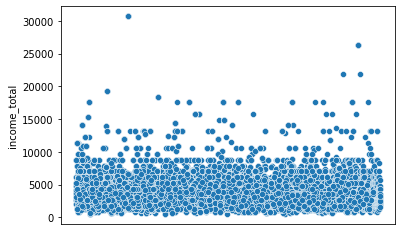

In [64]:
#plt.figure(figsize=(8,5))
ax=sns.scatterplot(x=train['id'],y=train['income_total'],data=train)
ax.set(xticklabels=[])
ax.set(xlabel=None)
ax.tick_params(bottom=False)

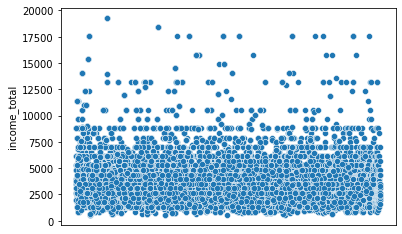

In [65]:
outlier2(train,'income_total')
ax=sns.scatterplot(x=train['id'],y=train['income_total'],data=train)
ax.set(xticklabels=[])
ax.set(xlabel=None)
ax.tick_params(bottom=False)

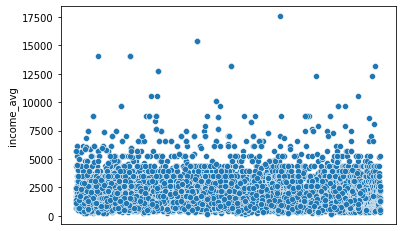

In [66]:
#plt.figure(figsize=(8,5))
ax=sns.scatterplot(x=test['id'],y=test['income_avg'],data=test)
ax.set(xticklabels=[])
ax.set(xlabel=None)
ax.tick_params(bottom=False)

In [67]:
# def outlier3(data,columns):
    
#     out=data[columns]>8e5
#     a=data[out].index
#     data.drop(a,inplace=True)
#     train.reset_index(inplace=True,drop=True)

In [68]:
# outlier3(test,'income_total')
# ax=sns.scatterplot(x=test['id'],y=test['income_avg'],data=test)
# ax.set(xticklabels=[])
# ax.set(xlabel=None)
# ax.tick_params(bottom=False)

In [69]:
# # outlier(train,'income_avg')
# outlier(test,'income_avg')
# ax=sns.scatterplot(x=test['id'],y=test['income_avg'],data=test)
# ax.set(xticklabels=[])
# ax.set(xlabel=None)
# ax.tick_params(bottom=False)

In [70]:
train.columns

Index(['id', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'work_phone',
       'phone', 'email', 'occyp_type', 'family_size', 'begin_month', 'credit',
       'YEARS_BIRTH', 'Age_group', 'YEARS_EMPLOYED', 'EMPLOYED_group',
       'income_avg'],
      dtype='object')

In [71]:
dis=['car','reality','child_num','income_type', 'edu_type', 'family_type', 'house_type', 'work_phone',
    'phone', 'email', 'family_size', 'credit', 'Age_group', 'EMPLOYED_group']

In [72]:
def disp(data,columns):
    if columns == 'EMPLOYED_group':
        grid = sns.catplot(x=columns, kind='count', data=data,order=['0~5','5~10','10~15','15~20','20~25','25~30','30~35','35~40','40~'])
    else:
        grid = sns.catplot(x=columns, kind='count', data=data,order=list(data[columns].value_counts().index).sort())
    ax = grid.axes[0, 0]
    ax.bar_label(ax.containers[0])
    plt.xticks(fontsize=10, rotation=-45)
    plt.show()
    #ax.set(title=columns)
    

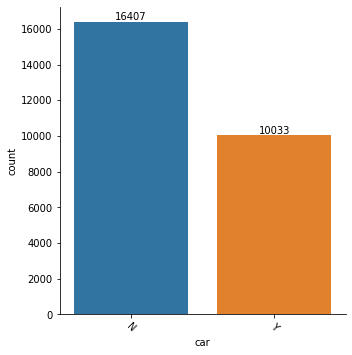

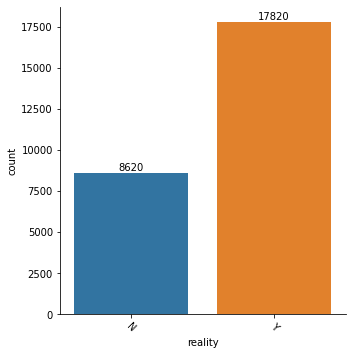

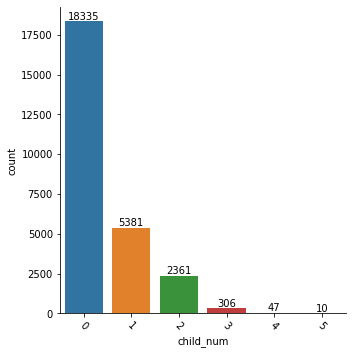

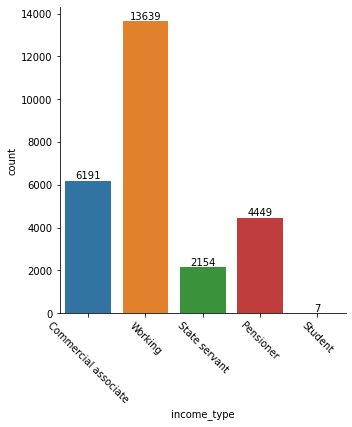

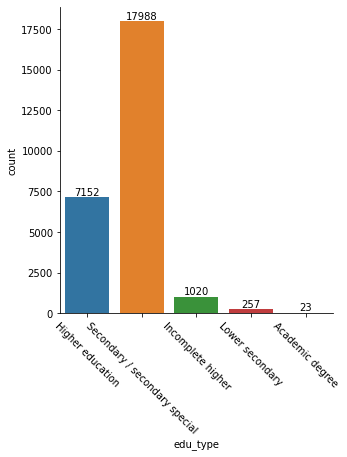

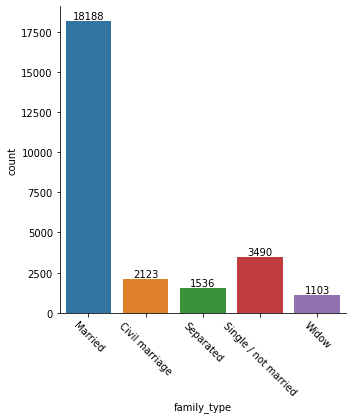

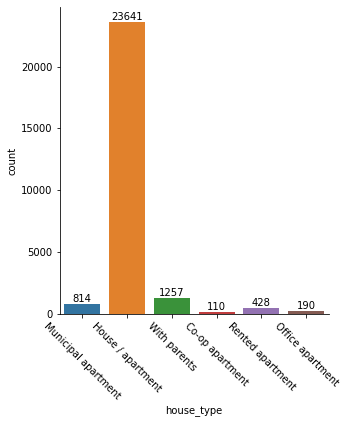

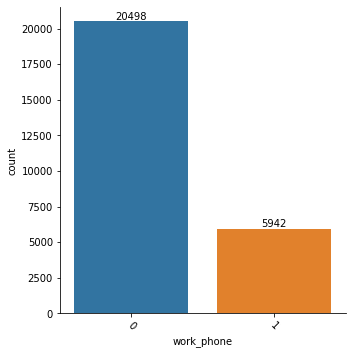

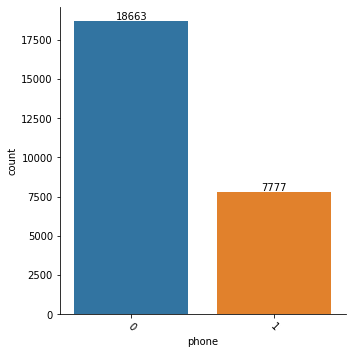

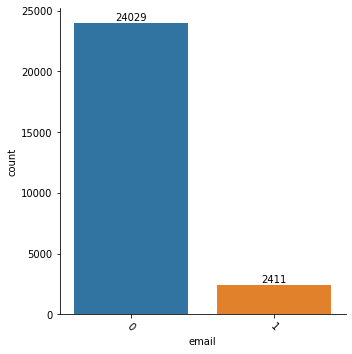

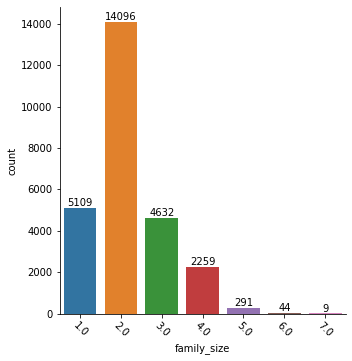

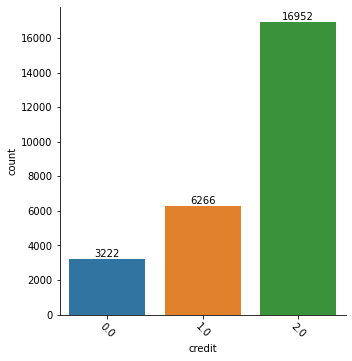

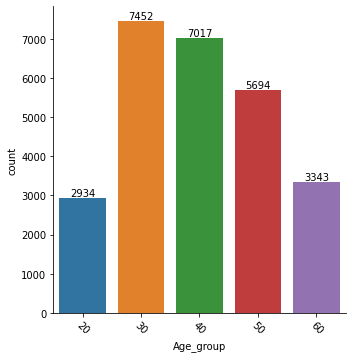

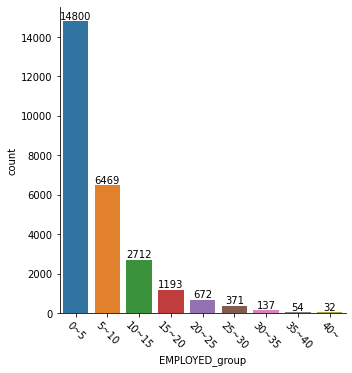

In [73]:
for i in dis:
    disp(train,i)

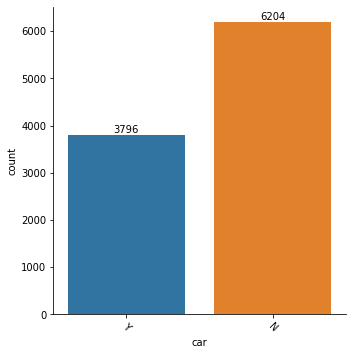

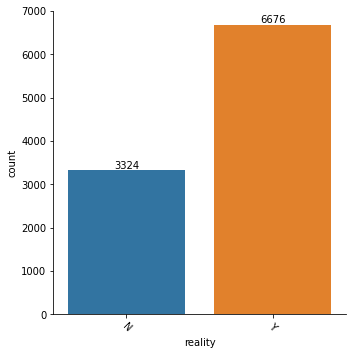

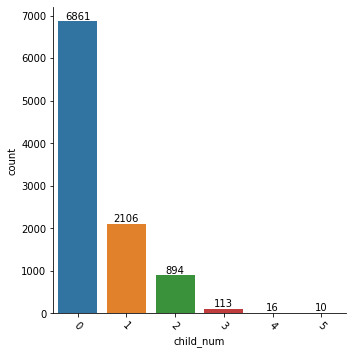

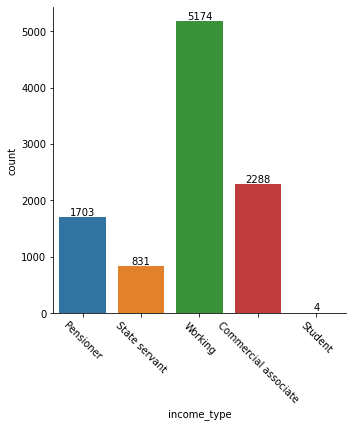

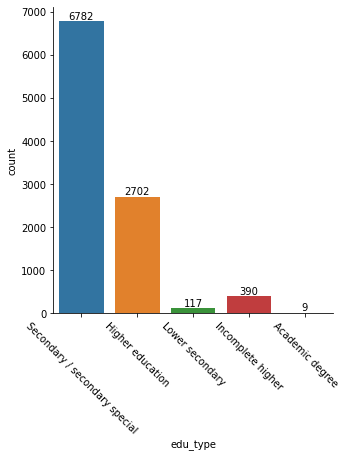

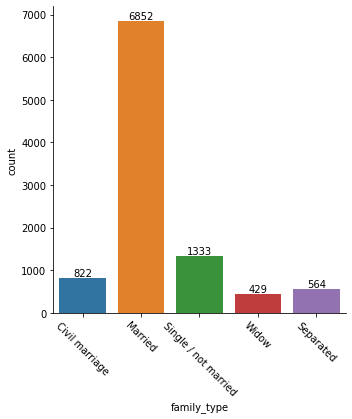

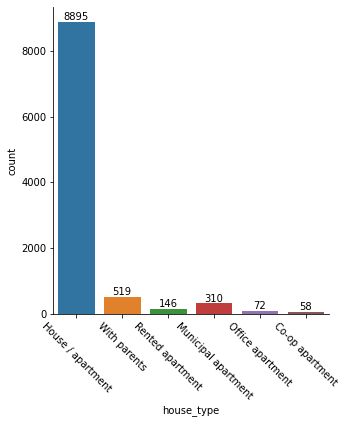

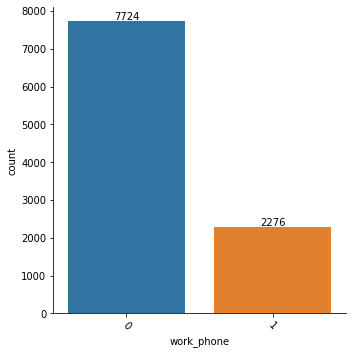

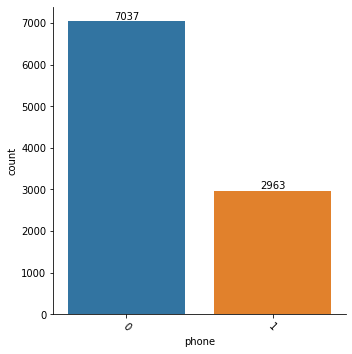

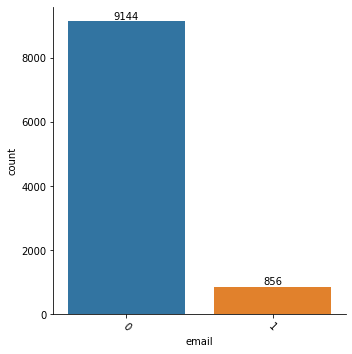

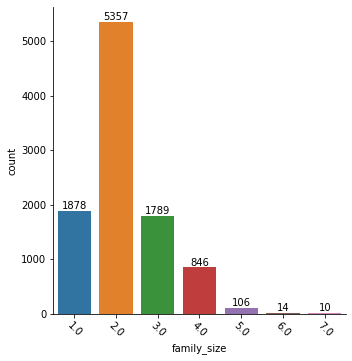

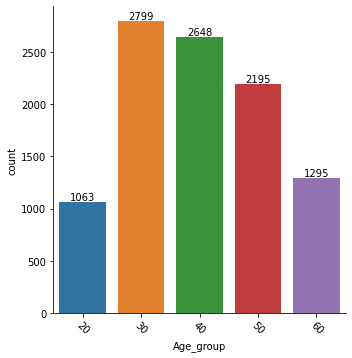

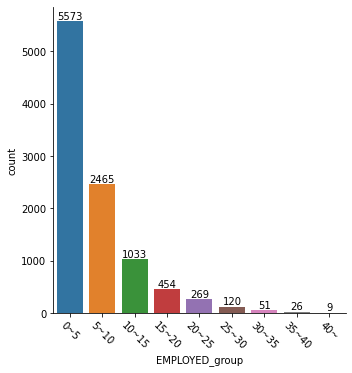

In [74]:
dis2=['car','reality','child_num','income_type', 'edu_type', 'family_type', 'house_type', 'work_phone',
    'phone', 'email', 'family_size',  'Age_group', 'EMPLOYED_group']

for i in dis2:
    disp(test,i)

In [75]:
train.to_csv('train2.csv')
test.to_csv('test2.csv')

In [76]:
test.shape

(10000, 21)